#Preprocesamiento y calidad de datos.

##Base de datos de partida y carga de datos

Los datos se pueden descargar a través de la página web www.opendatalapalma.es, el portal de acceso a los datos públicos del Cabildo de La Palma.

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google.colab import files
import itertools
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from pylab import pcolor, show, colorbar, xticks, yticks

Leemos el fichero de fuente de datos, que previamente hemos importado.

In [ ]:
df = pd.read_csv("Movimientos_sismicos.csv")
print(df)

             X        Y  OBJECTID_1  OBJECTID  Id  Date_  Time_  \
0     -17.8807  28.5661       70306       NaN NaN    NaN    NaN   
1     -17.8508  28.5584       70307       NaN NaN    NaN    NaN   
2     -17.8735  28.5719       70308       NaN NaN    NaN    NaN   
3     -17.8802  28.5656       70309       NaN NaN    NaN    NaN   
4     -17.8549  28.5499       70310       NaN NaN    NaN    NaN   
...        ...      ...         ...       ...  ..    ...    ...   
15557 -17.8804  28.6190       85865       NaN NaN    NaN    NaN   
15558 -17.8451  28.5525       85866       NaN NaN    NaN    NaN   
15559 -17.9003  28.6054       85867       NaN NaN    NaN    NaN   
15560 -17.8845  28.6263       85868       NaN NaN    NaN    NaN   
15561 -17.8634  28.5679       85869       NaN NaN    NaN    NaN   

                        DateTime_  ErrTime   RMS  ...    Qual  Author  \
0      2017/10/07 10:27:29.820+00     2.18  0.19  ...  m i ke     IGN   
1      2017/10/07 13:03:25.460+00     2.19  0.20 

Comprobamos los tipos y la cantidad de instacias que tenemos

In [ ]:
#Forma y tipos de datos de los datos
print(df.shape)
print(df.dtypes)

(15562, 32)
X             float64
Y             float64
OBJECTID_1      int64
OBJECTID      float64
Id            float64
Date_         float64
Time_         float64
DateTime_      object
ErrTime       float64
RMS           float64
Latitude      float64
Longitude     float64
Smaj          float64
Smin          float64
Az              int64
Depth         float64
ErrDepth      float64
Ndef            int64
Nsta            int64
Gap             int64
mdist         float64
Mdist_        float64
Qual           object
Author         object
OrigID         object
Magnitud      float64
IntensMax     float64
Localizaci    float64
TipoMagnit     object
XUTM            int64
YUTM            int64
GlobalID      float64
dtype: object


Luego, en el datasets en estudio constan 15562 ejemplos diferentes con 32 variables.

Subconjunto de variables númericas:

In [ ]:
#Se seleccionan columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])      #Se crea un data frame nuevo que seleccione las columnas de tipo numérico.
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['X' 'Y' 'OBJECTID_1' 'OBJECTID' 'Id' 'Date_' 'Time_' 'ErrTime' 'RMS'
 'Latitude' 'Longitude' 'Smaj' 'Smin' 'Az' 'Depth' 'ErrDepth' 'Ndef'
 'Nsta' 'Gap' 'mdist' 'Mdist_' 'Magnitud' 'IntensMax' 'Localizaci' 'XUTM'
 'YUTM' 'GlobalID']


In [ ]:
print(df_numeric.shape)

(15562, 27)


Hacemos lo mismo con las variables que no son númericas.

In [ ]:
#Se seleccionan columnas no numéricas
df_non_numeric = df.select_dtypes(exclude=[np.number])      #Se crea un data frame nuevo que seleccione las columnas de tipo no numérico.
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['DateTime_' 'Qual' 'Author' 'OrigID' 'TipoMagnit']


In [ ]:
print(df_non_numeric.shape)

(15562, 5)


De estos resultados, aprendemos que el conjunto de datos tiene 15.562 filas y 32 columnas. También identificamos si las características son variables numéricas o categóricas. En concreto, se cuenta con 27 variables de tipo numérico y 5 variables categóricas. Es posible que no todas estas variables sean información útil. Este hecho da lugar al siguiente punto.

# Missing values

## Missing Data Heatmap
Cuando hay un número menor de características, es útil visualizar los datos que faltan a través del mapa de calor.

 Se puede utilizar un único mapa de calor para las **32** características, ya que se aprecia comodamente los "missing values".

<Axes: >

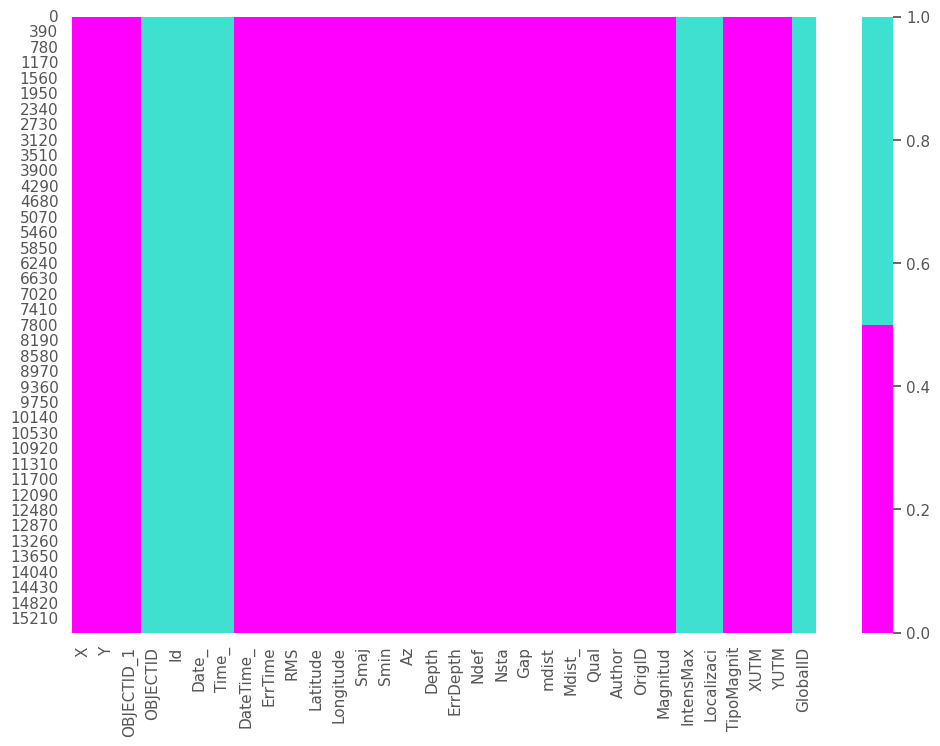

In [ ]:
#Primer gráfico con las 32 categorías.
cols = df.columns[:33]                    #32 columnas.
colours = ['#FF00FF', '#40E0D0']          #Se especifica el color turquesa para datos faltantes y fucsia para no faltantes.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las 32 características. El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color turquesa representa los datos que faltan, mientras que el color fucsia, en caso contrario.
Por ejemplo, vemos que la característica *OBJECTID_1*, *Id*, *Date_*, *Time_*, *IntensMax*, *Localizacion* y *GlobalID* tiene valores perdidos en todas las filas. Por otra parte, el resto de las características no tienen valores perdidos.

## Missing Data Percentage List
También podemos hacer una lista de los porcentajes de datos que faltan para cada característica. Es útil cuando se dispone muchas características en el conjunto de datos.

In [ ]:
#Si se trata de un conjunto de datos más grande y la visualización lleva demasiado tiempo, conviene hacerlo.
#Porcentaje de valores perdidos.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

X - 0%
Y - 0%
OBJECTID_1 - 0%
OBJECTID - 100%
Id - 100%
Date_ - 100%
Time_ - 100%
DateTime_ - 0%
ErrTime - 0%
RMS - 0%
Latitude - 0%
Longitude - 0%
Smaj - 0%
Smin - 0%
Az - 0%
Depth - 0%
ErrDepth - 0%
Ndef - 0%
Nsta - 0%
Gap - 0%
mdist - 0%
Mdist_ - 0%
Qual - 0%
Author - 0%
OrigID - 0%
Magnitud - 0%
IntensMax - 100%
Localizaci - 100%
TipoMagnit - 0%
XUTM - 0%
YUTM - 0%
GlobalID - 100%


Esto produce una lista que muestra el porcentaje de valores faltantes para cada una de las características. En concreto, se observa que tenemos características totalmente vacías:
1. OBJECTID - 100%
2. Id - 100%
3. Date_ - 100%
4. Time_ - 100%
5. IntensMax - 100%
6. Localizaci - 100%
7. GlobalID - 100%

Cuando llegue el momento serán borradas porque estas características no contienen ni un solo dato y, por ende, no aportan ninguna información.

No existen otras variables con un alto porcentaje de valores perdidos o con un porcentaje menos significativo donde se tenga que decidir que hacer con ellas.

Esta claro que la lista de porcentajes generada es un resumen útil que puede complementar la visualización del mapa de calor.

##Dejar o no dejar la característica
Eliminamos la característica cuando estamos seguros de que esta no proporciona información útil.

Por ejemplo, de la lista de porcentajes de datos faltantes, se había comentado una serie de características totalmente vacías.

Por otra parte, hay que estar seguro de que una característica no proporciona información útil para que sea borrada. Luego, se decide eliminar únicamente aquellas características cuyo porcentaje de valores faltantes es el 100%. Estas son:
1. OBJECTID - 100%
2. Id - 100%
3. Date_ - 100%
4. Time_ - 100%
5. IntensMax - 100%
6. Localizaci - 100%
7. GlobalID - 100%

In [ ]:
df = df_numeric
df.drop(["OBJECTID",'Id','Date_','Time_','IntensMax', 'Localizaci', 'GlobalID'], axis = 1, inplace = True)
df.head()

,X,Y,OBJECTID_1,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,70306,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,70307,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,70308,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,70309,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,70310,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


La variable OBJECTID_1 la detecta como numérica cuando realmente no lo es, es un identificador único para el evento del terremoto.

In [ ]:
df.drop(["OBJECTID_1"], axis = 1, inplace = True)
df.head()

,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


In [ ]:
#Comprobación
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

X - 0%
Y - 0%
ErrTime - 0%
RMS - 0%
Latitude - 0%
Longitude - 0%
Smaj - 0%
Smin - 0%
Az - 0%
Depth - 0%
ErrDepth - 0%
Ndef - 0%
Nsta - 0%
Gap - 0%
mdist - 0%
Mdist_ - 0%
Magnitud - 0%
XUTM - 0%
YUTM - 0%


Se obtiene una lista donde el porcentaje de valores perdidos para cada variable es nulo.
Nuestro Datasets está limpio. de datos faltantes.

##Outliers


Sí debes normalizar si:

Las variables tienen escalas muy diferentes (ej. magnitud de sismos vs. profundidad en km).

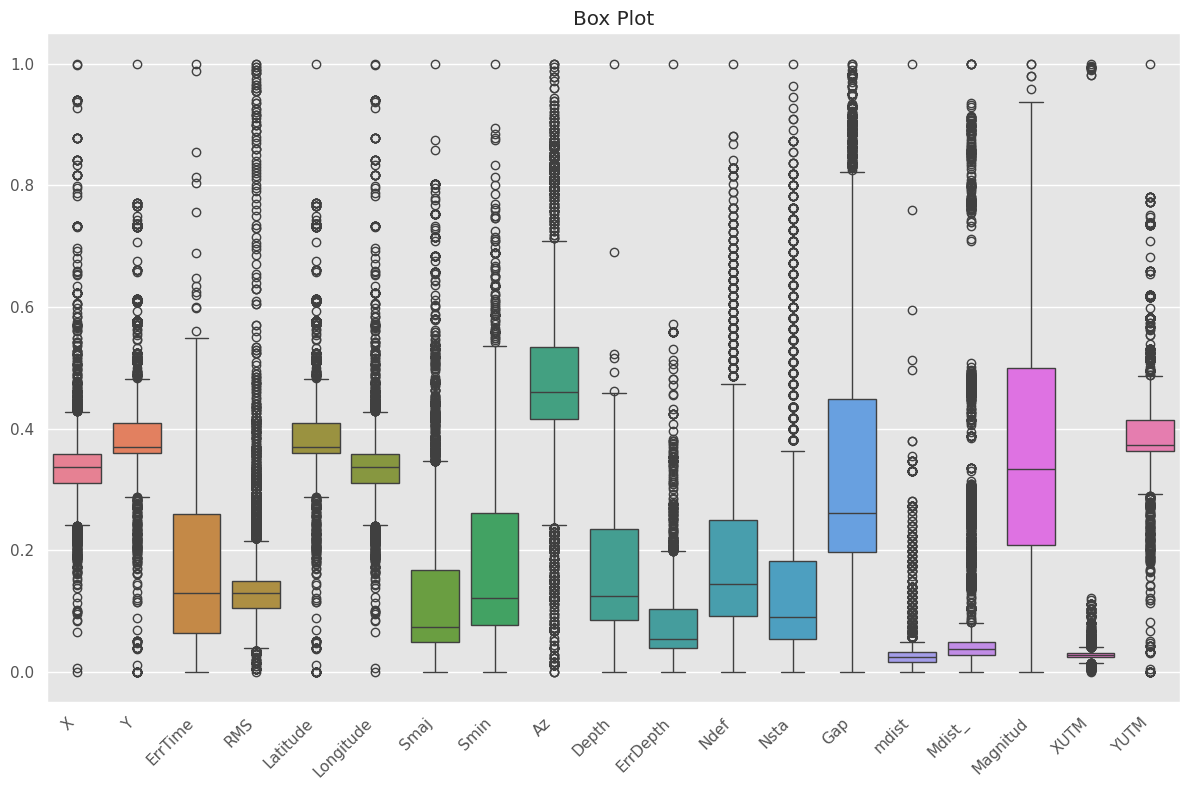

In [ ]:
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_norm)
plt.title("Box Plot")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Selección de características



Para empezar cargamos los datos en un DataFrame de la librería Pandas y mostramos nuevamente los datos:

In [ ]:
#Si se trata de un conjunto de datos más grande y la visualización lleva demasiado tiempo, conviene hacer una lista de porcentajes de valores perdidos.
import pandas as pd
import io
df.head(5)

,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


# Correlación entre variables



Se calcula, mediante el test de correlación de Pearson, los coeficientes de correlaciones que se corresponde con cada uno de los posibles pares de las variables del conjunto de datos en estudio.

In [ ]:
df_feat = df
df_feat = df_feat.astype('float')
corr_df = df_feat.corr(method='pearson')

print("El DataFrame de correlaciones es:")
print(corr_df, "\n")

El DataFrame de correlaciones es:
                  X         Y   ErrTime       RMS  Latitude  Longitude  \
X          1.000000  0.145250 -0.149929  0.161982  0.145250   1.000000   
Y          0.145250  1.000000 -0.179837 -0.082394  1.000000   0.145250   
ErrTime   -0.149929 -0.179837  1.000000 -0.281757 -0.179837  -0.149929   
RMS        0.161982 -0.082394 -0.281757  1.000000 -0.082394   0.161982   
Latitude   0.145250  1.000000 -0.179837 -0.082394  1.000000   0.145250   
Longitude  1.000000  0.145250 -0.149929  0.161982  0.145250   1.000000   
Smaj      -0.042730 -0.293235  0.749360 -0.163479 -0.293235  -0.042730   
Smin      -0.108811 -0.283588  0.869371 -0.209161 -0.283588  -0.108811   
Az         0.134751  0.676339 -0.352597  0.079522  0.676339   0.134751   
Depth      0.021400 -0.467162  0.580249 -0.051372 -0.467162   0.021400   
ErrDepth   0.056517 -0.074598  0.789362 -0.109115 -0.074598   0.056517   
Ndef       0.113241 -0.418152 -0.511128  0.315976 -0.418152   0.113241   
Nsta

La interpretación de estos valores es sencilla, basta con saber que aquellos valores cercanos a cero representan un menor grado de asociación entre un par de variables y los cercanos a 1 y -1 una mayor correlación entre el par de variables. Sin embargo, buscar aquellas características que están más, o menos, correladas en función de estos valores podría resultar algo tedioso, tal y como se han presentado. Así que podríamos apoyarnos en algún gráfico que muestre, de forma más clara, las correlaciones anteriores. Por ejemplo, los dos siguientes:

<Axes: >

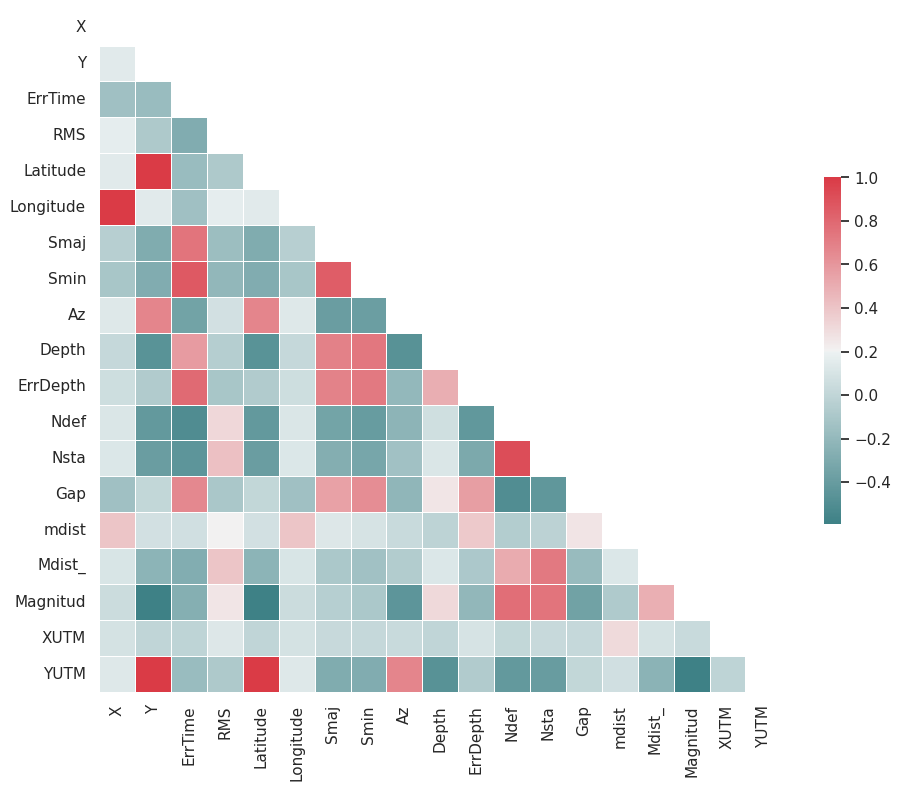

In [ ]:
R = df_feat.corr()

sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr_df,mask=mask, cmap=cmap,square = True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
corr_df.style.background_gradient(cmap='coolwarm')


,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
X,1.000000,0.145250,-0.149929,0.161982,0.145250,1.000000,-0.042730,-0.108811,0.134751,0.021400,0.056517,0.113241,0.117685,-0.149383,0.397034,0.109222,0.045353,0.090885,0.133670
Y,0.145250,1.000000,-0.179837,-0.082394,1.000000,0.145250,-0.293235,-0.283588,0.676339,-0.467162,-0.074598,-0.418152,-0.392264,0.005662,0.076234,-0.237587,-0.590548,-0.005827,0.999931
ErrTime,-0.149929,-0.179837,1.000000,-0.281757,-0.179837,-0.149929,0.749360,0.869371,-0.352597,0.580249,0.789362,-0.511128,-0.447668,0.662708,0.071121,-0.279091,-0.265741,-0.011746,-0.178271
RMS,0.161982,-0.082394,-0.281757,1.000000,-0.082394,0.161982,-0.163479,-0.209161,0.079522,-0.051372,-0.109115,0.315976,0.419744,-0.104339,0.209374,0.400242,0.256920,0.128970,-0.084523
Latitude,0.145250,1.000000,-0.179837,-0.082394,1.000000,0.145250,-0.293235,-0.283588,0.676339,-0.467162,-0.074598,-0.418152,-0.392264,0.005662,0.076234,-0.237587,-0.590548,-0.005827,0.999931
Longitude,1.000000,0.145250,-0.149929,0.161982,0.145250,1.000000,-0.042730,-0.108811,0.134751,0.021400,0.056517,0.113241,0.117685,-0.149383,0.397034,0.109222,0.045353,0.090885,0.133670
Smaj,-0.042730,-0.293235,0.749360,-0.163479,-0.293235,-0.042730,1.000000,0.849668,-0.390802,0.693909,0.686648,-0.346003,-0.271903,0.553586,0.128085,-0.097882,-0.048232,0.023646,-0.293184
Smin,-0.108811,-0.283588,0.869371,-0.209161,-0.283588,-0.108811,0.849668,1.000000,-0.381506,0.734528,0.724998,-0.404294,-0.327916,0.633397,0.097157,-0.142350,-0.099229,0.018798,-0.282736
Az,0.134751,0.676339,-0.352597,0.079522,0.676339,0.134751,-0.390802,-0.381506,1.000000,-0.471126,-0.201956,-0.225289,-0.142370,-0.214403,0.033810,-0.064002,-0.443147,0.034991,0.675715
Depth,0.021400,-0.467162,0.580249,-0.051372,-0.467162,0.021400,0.693909,0.734528,-0.471126,1.000000,0.502214,0.066127,0.113515,0.254239,-0.014195,0.117150,0.310870,-0.003822,-0.468142


La gama de colores empleados y su interpretación coincide con la del gráfico anterior. Se destaca que contamos con los valores de la matriz de correlaciones. Así se observa que los siguientes pares de variables están altamente correlados:

1. Latitude - Y

2. YUTM - Y

3. Longitude - X

4. Nsta - Ndef

5. Smin - ErrTime

6. Smin - Smaj

En concreto, presentan un coeficiente de correlación superior a 0.8. Por ende, podríamos eliminar una variable por cada par. Se ejecutan los modelos eliminando una u otra variable dentro del par, se eliminan aquellas que dan como resultado un mayor error.

También se elimina la variable XUTM, aunque no muestre correlación con otras variables debido a que presenta la misma información que la longitud.

In [ ]:
df_feat = df_feat.drop(['X','Y', 'Smin','Smaj', 'Nsta', 'XUTM','YUTM'],axis=1)
df_feat.head()

,ErrTime,RMS,Latitude,Longitude,Az,Depth,ErrDepth,Ndef,Gap,mdist,Mdist_,Magnitud
0,2.18,0.19,28.5661,-17.8807,81.0,21.6,12.7,9.0,189.0,0.02,0.20,1.6
1,2.19,0.20,28.5584,-17.8508,67.0,28.2,13.0,8.0,149.0,0.03,0.13,2.7
2,2.33,0.16,28.5719,-17.8735,87.0,24.2,14.0,8.0,181.0,0.01,0.19,1.7
3,2.44,0.11,28.5656,-17.8802,87.0,24.4,13.7,8.0,189.0,0.02,0.20,1.7
4,1.93,0.17,28.5499,-17.8549,90.0,26.3,11.5,10.0,168.0,0.03,0.20,2.6


In [ ]:
corr_df = df_feat.corr(method='pearson')

print("El DataFrame de correlaciones es:")
print(corr_df, "\n")

El DataFrame de correlaciones es:
            ErrTime       RMS  Latitude  Longitude        Az     Depth  \
ErrTime    1.000000 -0.281757 -0.179837  -0.149929 -0.352597  0.580249   
RMS       -0.281757  1.000000 -0.082394   0.161982  0.079522 -0.051372   
Latitude  -0.179837 -0.082394  1.000000   0.145250  0.676339 -0.467162   
Longitude -0.149929  0.161982  0.145250   1.000000  0.134751  0.021400   
Az        -0.352597  0.079522  0.676339   0.134751  1.000000 -0.471126   
Depth      0.580249 -0.051372 -0.467162   0.021400 -0.471126  1.000000   
ErrDepth   0.789362 -0.109115 -0.074598   0.056517 -0.201956  0.502214   
Ndef      -0.511128  0.315976 -0.418152   0.113241 -0.225289  0.066127   
Gap        0.662708 -0.104339  0.005662  -0.149383 -0.214403  0.254239   
mdist      0.071121  0.209374  0.076234   0.397034  0.033810 -0.014195   
Mdist_    -0.279091  0.400242 -0.237587   0.109222 -0.064002  0.117150   
Magnitud  -0.265741  0.256920 -0.590548   0.045353 -0.443147  0.310870   

   

<Axes: >

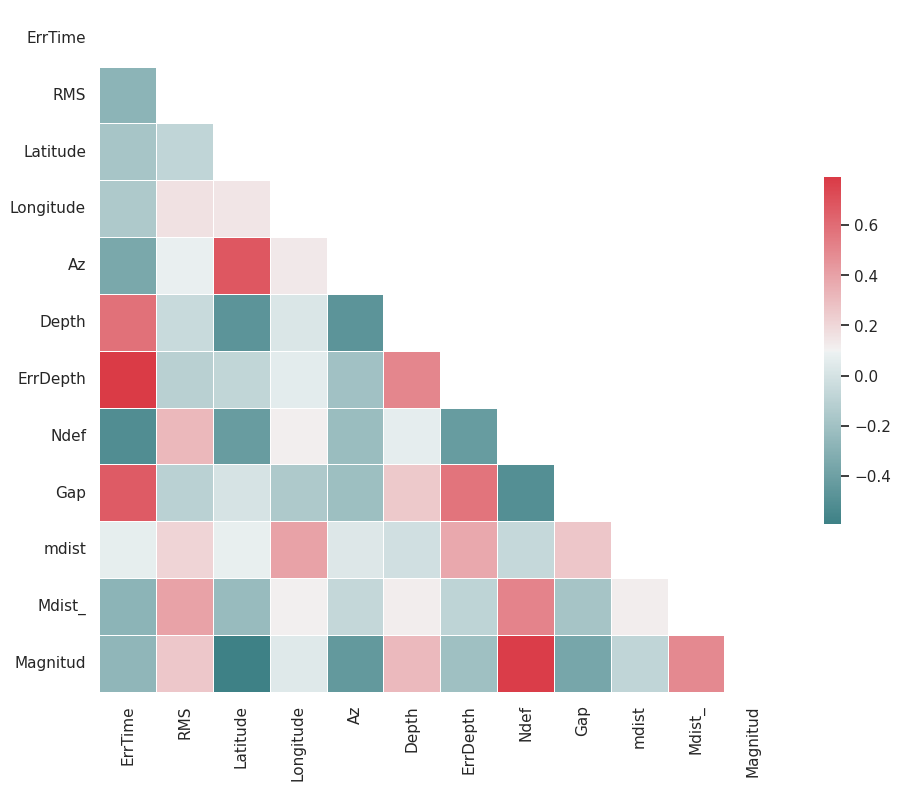

In [ ]:
R = df_feat.corr()

sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr_df,mask=mask, cmap=cmap,square = True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
corr_df.style.background_gradient(cmap='coolwarm')

,ErrTime,RMS,Latitude,Longitude,Az,Depth,ErrDepth,Ndef,Gap,mdist,Mdist_,Magnitud
ErrTime,1.000000,-0.281757,-0.179837,-0.149929,-0.352597,0.580249,0.789362,-0.511128,0.662708,0.071121,-0.279091,-0.265741
RMS,-0.281757,1.000000,-0.082394,0.161982,0.079522,-0.051372,-0.109115,0.315976,-0.104339,0.209374,0.400242,0.256920
Latitude,-0.179837,-0.082394,1.000000,0.145250,0.676339,-0.467162,-0.074598,-0.418152,0.005662,0.076234,-0.237587,-0.590548
Longitude,-0.149929,0.161982,0.145250,1.000000,0.134751,0.021400,0.056517,0.113241,-0.149383,0.397034,0.109222,0.045353
Az,-0.352597,0.079522,0.676339,0.134751,1.000000,-0.471126,-0.201956,-0.225289,-0.214403,0.033810,-0.064002,-0.443147
Depth,0.580249,-0.051372,-0.467162,0.021400,-0.471126,1.000000,0.502214,0.066127,0.254239,-0.014195,0.117150,0.310870
ErrDepth,0.789362,-0.109115,-0.074598,0.056517,-0.201956,0.502214,1.000000,-0.426497,0.569138,0.378621,-0.089125,-0.211198
Ndef,-0.511128,0.315976,-0.418152,0.113241,-0.225289,0.066127,-0.426497,1.000000,-0.502973,-0.059649,0.510230,0.773304
Gap,0.662708,-0.104339,0.005662,-0.149383,-0.214403,0.254239,0.569138,-0.502973,1.000000,0.262638,-0.182965,-0.361787
mdist,0.071121,0.209374,0.076234,0.397034,0.033810,-0.014195,0.378621,-0.059649,0.262638,1.000000,0.118597,-0.080076


Los modelos tradicionales como la Regresión Lineal o incluso redes neuronales recurrentes como LSTM no pueden interpretar automáticamente Latitud y Longitud como información espacial.

Si la mayoría de los sismos en el dataset ocurren en una zona específica, la regresión lineal podría aprender que la magnitud está relacionada con la ubicación, cuando en realidad es una coincidencia. Esto reduce la capacidad de generalización del modelo.

Se podría considerar convertir las variables de posición del sismo en una distancia a un punto relevante como el epicentro de la erupción o a una falla activa. Sin embargo, esto no es aplicacle a este caso.

Por esto, se eliminan también las variables 'Latitude' y 'Longitude'.

In [ ]:
df_feat = df_feat.drop(['Longitude','Latitude'],axis=1)
df_feat.head()

,ErrTime,RMS,Az,Depth,ErrDepth,Ndef,Gap,mdist,Mdist_,Magnitud
0,2.18,0.19,81.0,21.6,12.7,9.0,189.0,0.02,0.20,1.6
1,2.19,0.20,67.0,28.2,13.0,8.0,149.0,0.03,0.13,2.7
2,2.33,0.16,87.0,24.2,14.0,8.0,181.0,0.01,0.19,1.7
3,2.44,0.11,87.0,24.4,13.7,8.0,189.0,0.02,0.20,1.7
4,1.93,0.17,90.0,26.3,11.5,10.0,168.0,0.03,0.20,2.6


In [ ]:
import shutil
#Guardar DataFrame en CSV
df_feat.to_csv('Datos_resultantes.csv', index=False)

## Análisis de componentes principales

Con el fin de observar como están relacionadas las variables también podemos hacer una representación en PCA de las mismas


Componentes lineales:
 [[0.00732118 0.00730239 0.00749516 ... 0.00729871 0.00758138 0.00763   ]
 [0.00767303 0.00739904 0.00650189 ... 0.00816568 0.00622653 0.00550359]]

Ratio de variabilidad:  [0.92612782 0.06339715] 



<ipython-input-55-9807b041894f>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


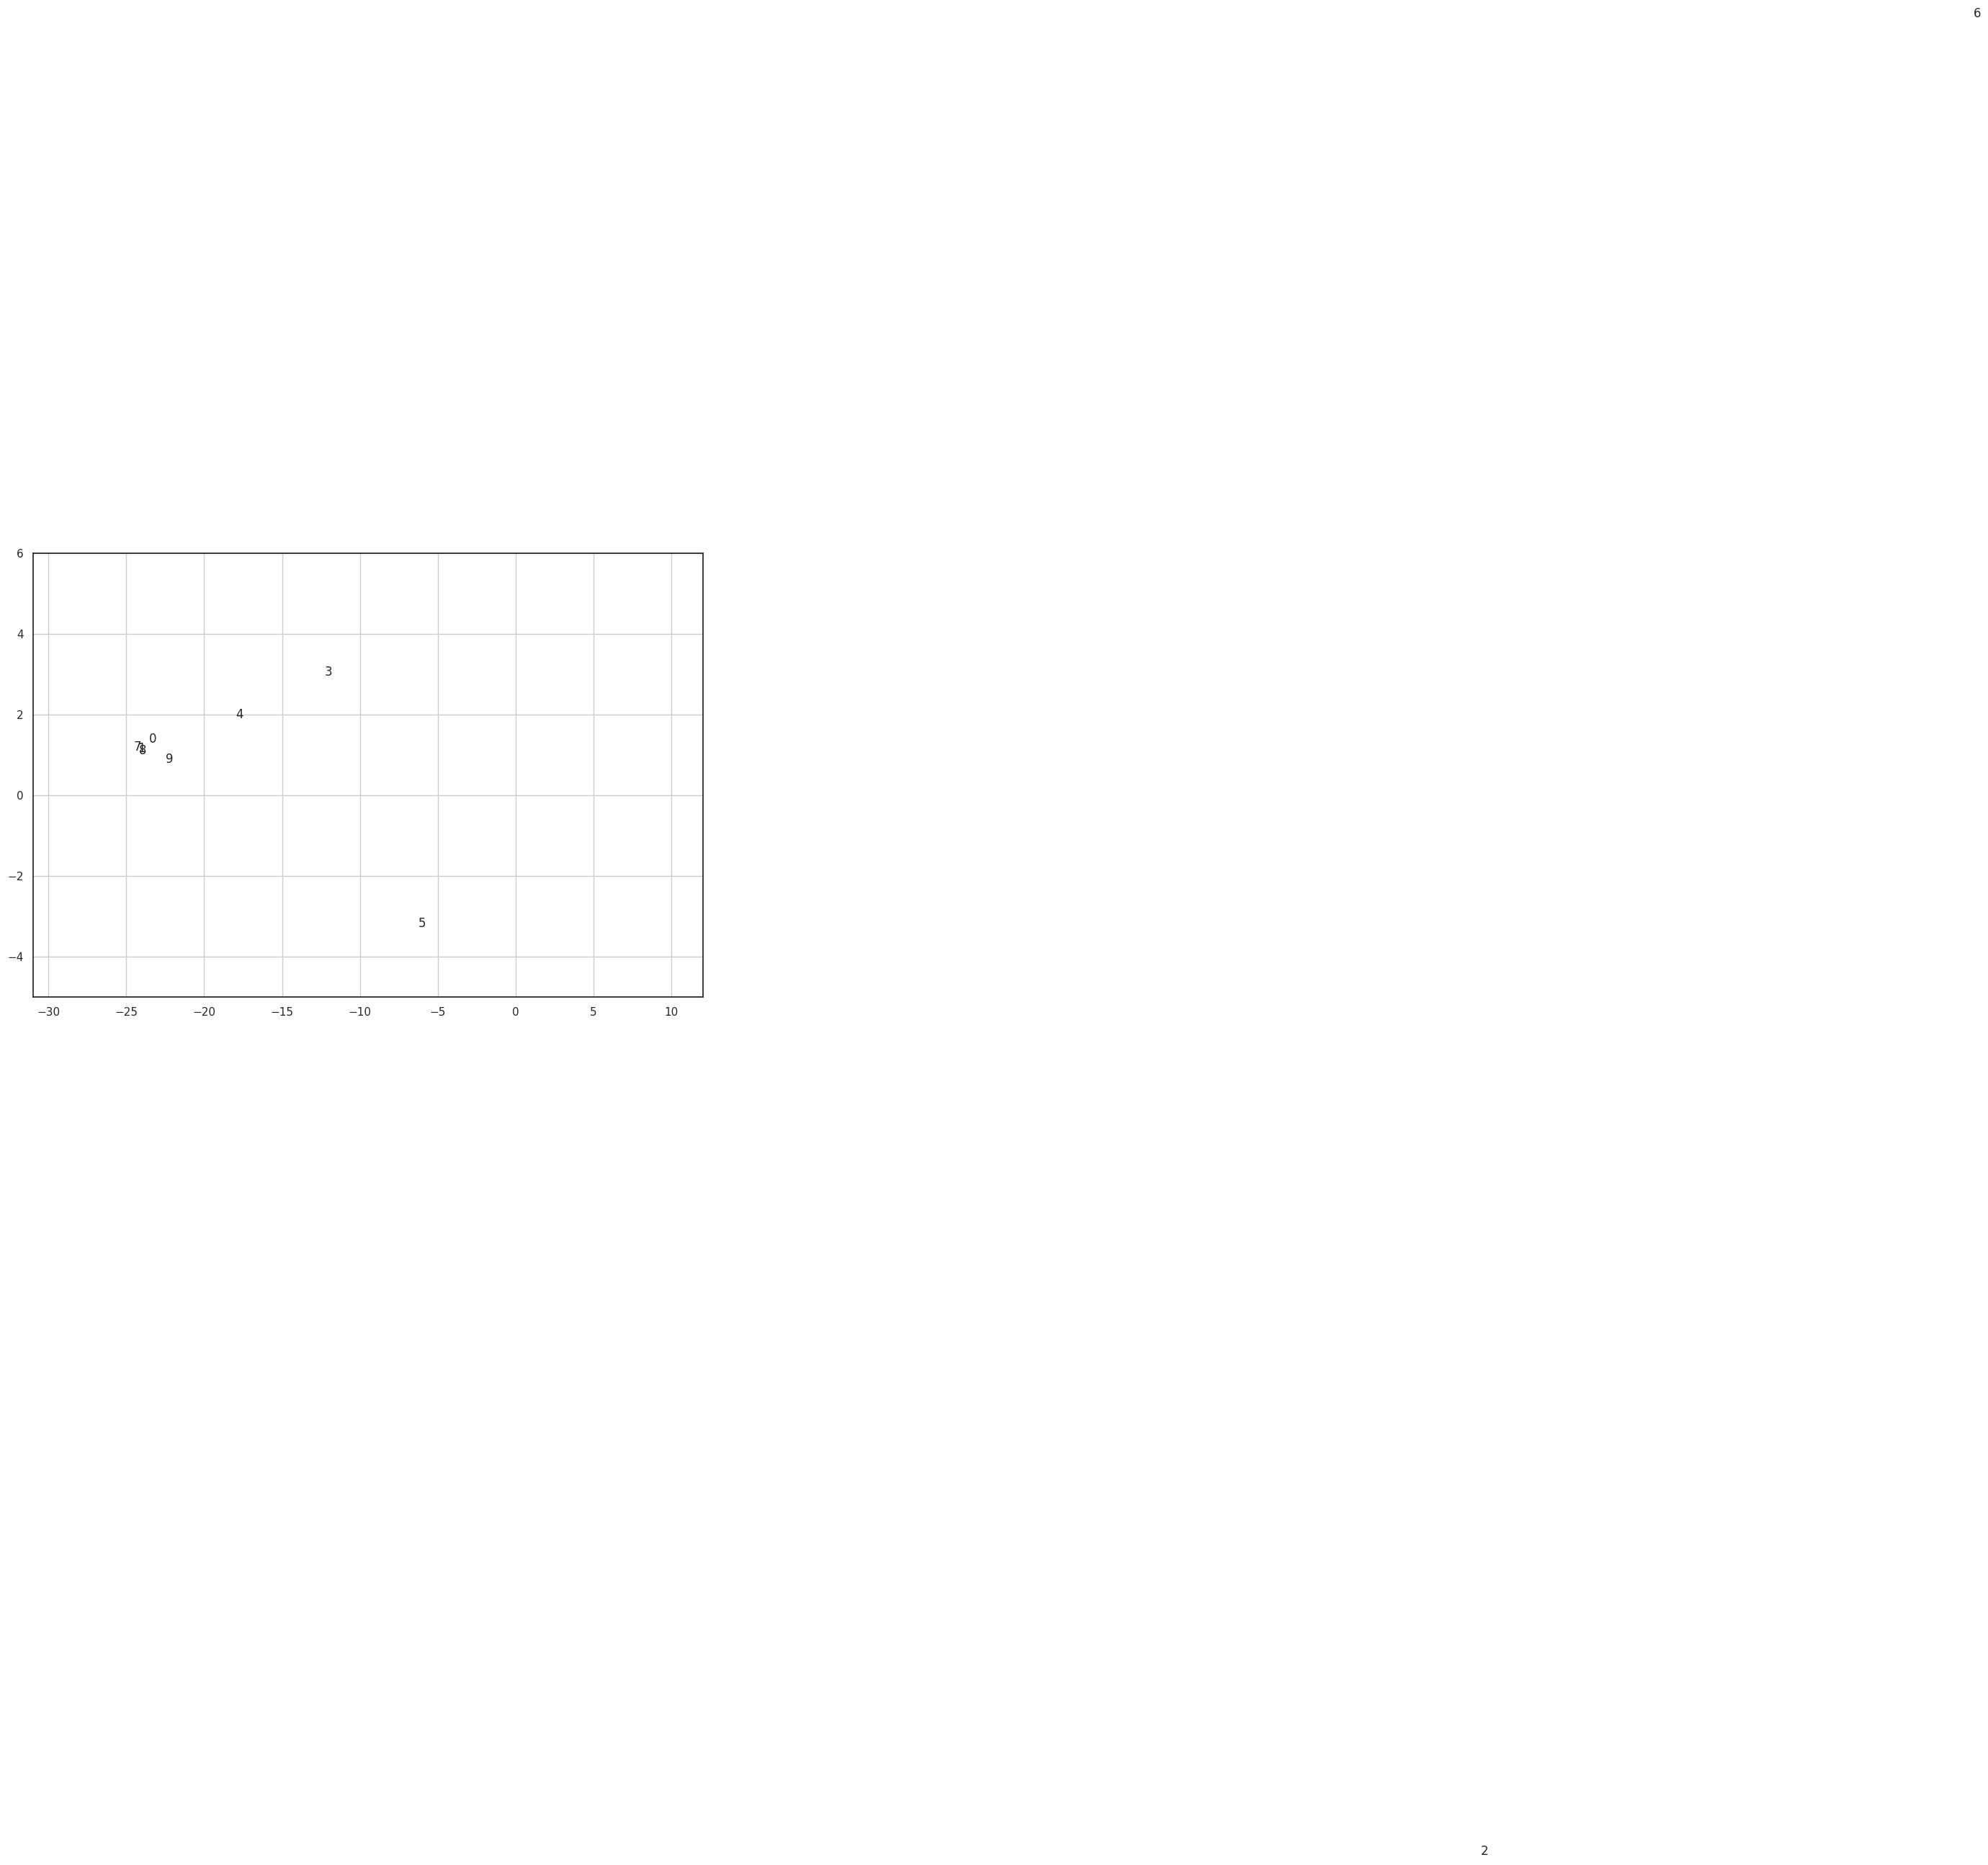

In [ ]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
df_feat_t = transpose(df_feat)
names =  df_feat.index
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat_t)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

ax.grid(True)
plt.xlim(-31, 12)
plt.ylim(-5, 6)
fig.tight_layout()
plt.show()

El análisis de componentes principales es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables no correlacionadas. Este es uno de los motivos por los que se ha eliminado previamentente las variables altamente correlacionadas.


Vamos ahora a determinar mediante diferentes métodos de machine learning no supervisado las diferentes agrupaciones de nuestro conjunto de variables seleccionados.

In [ ]:
df_feat = df_feat.drop(['Magnitud'],axis=1)

Componente 1: 43.48% de varianza explicada
Componente 2: 27.98% de varianza explicada
Componente 3: 12.15% de varianza explicada
Componente 4: 7.30% de varianza explicada
Componente 5: 3.71% de varianza explicada
Componente 6: 2.83% de varianza explicada
Componente 7: 1.55% de varianza explicada
Componente 8: 0.74% de varianza explicada
Componente 9: 0.25% de varianza explicada


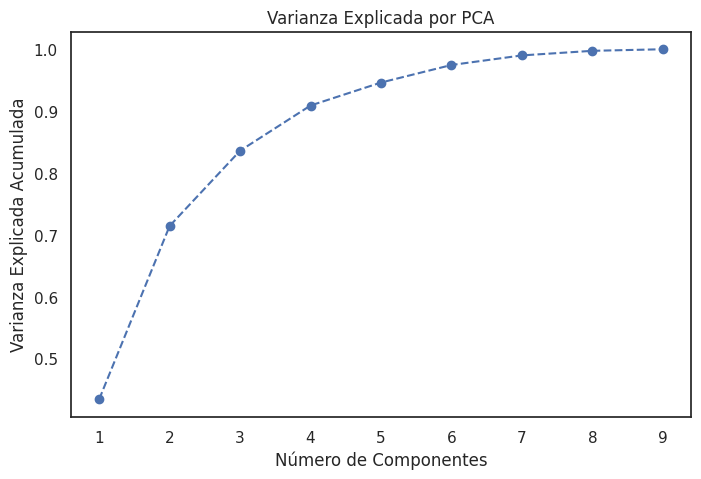

In [ ]:
# Normalizar los datos
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(df_feat)

pca = PCA()
pca.fit(data_scaled)

# Varianza explicativa
varianza_explicativa = pca.explained_variance_ratio_

# Mostrar resultados
for i, var in enumerate(varianza_explicativa):
    print(f"Componente {i+1}: {var:.2%} de varianza explicada")

# Gráfico de la varianza explicativa acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_explicativa) + 1), varianza_explicativa.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.show()


In [ ]:
# Obtener pesos de PC1
pc1_loadings = pca.components_[0]  # Pesos del primer componente
variables = df_feat.columns  # Nombres de las variables

# Crear un DataFrame con las contribuciones de cada variable
pc1_df = pd.DataFrame({'Variable': variables, 'Peso en PC1': pc1_loadings})
pc1_df = pc1_df.sort_values(by='Peso en PC1', key=abs, ascending=False)  # Ordenar por valor absoluto

# Mostrar resultados
print(pc1_df)


   Variable  Peso en PC1
6       Gap     0.744564
2        Az    -0.417368
0   ErrTime     0.365382
5      Ndef    -0.225519
3     Depth     0.215453
4  ErrDepth     0.137705
8    Mdist_    -0.129647
1       RMS    -0.067068
7     mdist     0.019397


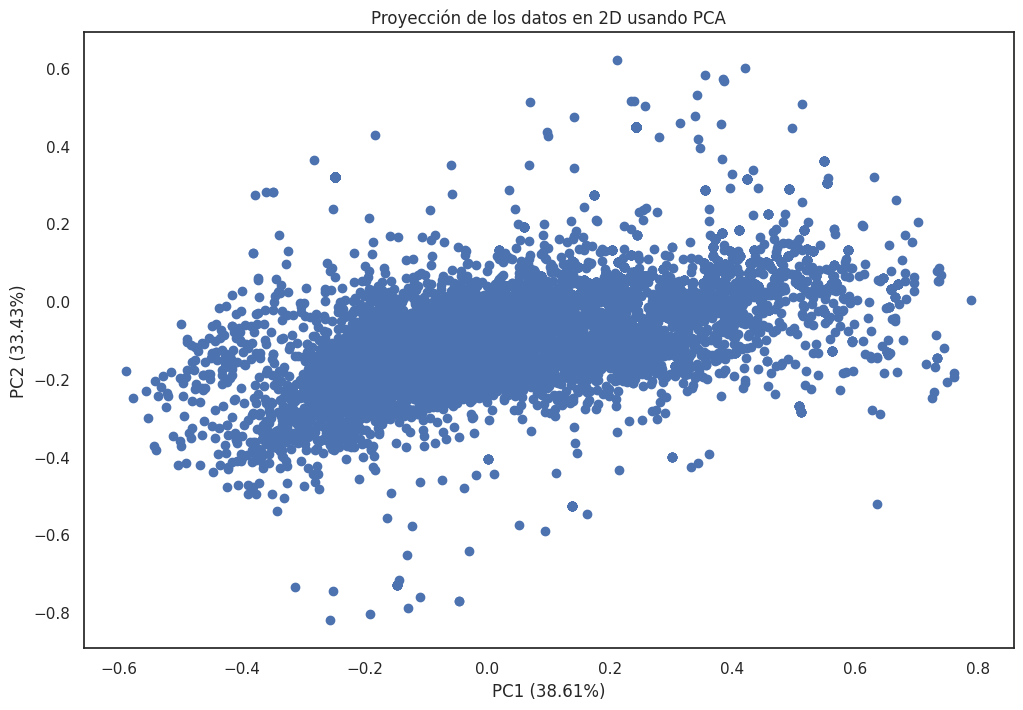

In [ ]:
# Aplicar PCA con 2 componentes
pca_2d = PCA(n_components=2)
data_pca = pca_2d.fit_transform(data_scaled)

# Graficar
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("PC1 (38.61%)")
plt.ylabel("PC2 (33.43%)")
plt.title("Proyección de los datos en 2D usando PCA")
plt.show()


In [ ]:
pca = PCA()
pca.fit(data_scaled)

# Obtener pesos de las variables en los primeros dos componentes
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]
variables = df_feat.columns  # Nombres de las variables

# Crear un DataFrame con las contribuciones de cada variable
pc_df = pd.DataFrame({'Variable': variables, 'PC1': pc1_loadings, 'PC2': pc2_loadings})
pc_df = pc_df.sort_values(by='PC1', key=abs, ascending=False)  # Ordenar por valor absoluto en PC1

# Mostrar resultados
print(pc_df)


   Variable       PC1       PC2
6       Gap  0.744564  0.302503
2        Az -0.417368  0.781076
0   ErrTime  0.365382  0.039948
5      Ndef -0.225519 -0.409915
3     Depth  0.215453 -0.227407
4  ErrDepth  0.137705  0.027906
8    Mdist_ -0.129647 -0.270944
1       RMS -0.067068 -0.051484
7     mdist  0.019397  0.015248


Número de componentes necesarios para explicar el 95% de la varianza: 6


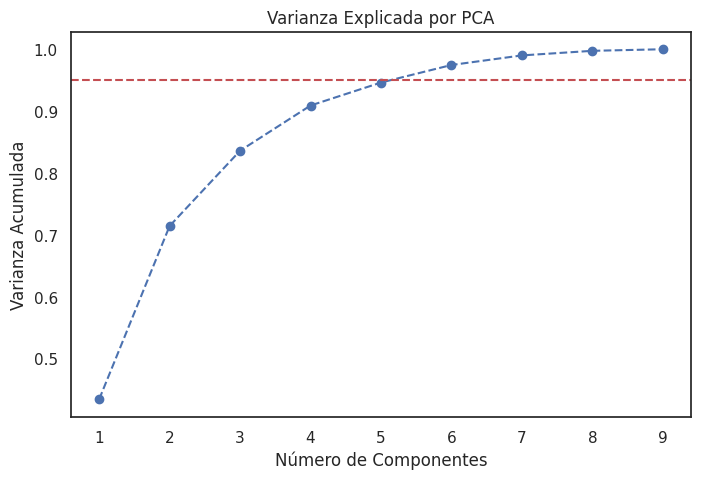

        PC1       PC2       PC3       PC4       PC5       PC6
0  0.241216  0.037344 -0.045330  0.090301 -0.040642  0.001063
1  0.195977 -0.071055 -0.132029  0.163467 -0.061412  0.039446
2  0.228474  0.057188 -0.057621  0.145991 -0.045074 -0.005912
3  0.256533  0.066185 -0.053414  0.148287 -0.046924 -0.031454
4  0.159898  0.037142 -0.052899  0.143246 -0.016337 -0.011411


In [ ]:

# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

# Determinar el número de componentes que acumulan al menos el 95%
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes necesarios para explicar el 95% de la varianza: {num_components}")

# Graficar la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Explicada por PCA')
plt.show()

# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=num_components)
data_pca = pca_optimal.fit_transform(data_scaled)

# Convertir a DataFrame si necesitas visualizarlo
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print(data_pca_df.head())


In [ ]:
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.241216,0.037344,-0.045330,0.090301,-0.040642,0.001063
1,0.195977,-0.071055,-0.132029,0.163467,-0.061412,0.039446
2,0.228474,0.057188,-0.057621,0.145991,-0.045074,-0.005912
3,0.256533,0.066185,-0.053414,0.148287,-0.046924,-0.031454
4,0.159898,0.037142,-0.052899,0.143246,-0.016337,-0.011411


In [ ]:
df_feat = pd.concat([data_pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], df['Magnitud']], axis=1)
print(df_feat.head())

        PC1       PC2       PC3       PC4       PC5  Magnitud
0  0.241216  0.037344 -0.045330  0.090301 -0.040642       1.6
1  0.195977 -0.071055 -0.132029  0.163467 -0.061412       2.7
2  0.228474  0.057188 -0.057621  0.145991 -0.045074       1.7
3  0.256533  0.066185 -0.053414  0.148287 -0.046924       1.7
4  0.159898  0.037142 -0.052899  0.143246 -0.016337       2.6


In [ ]:
# Definir proporción de división (80% entrenamiento, 20% prueba)
train_size = int(0.7 * len(df_feat))

# Dividir datos sin aleatorizar
train = df_feat.iloc[:train_size]  # Primer 70% para entrenamiento
test = df_feat.iloc[train_size:]   # Último 30% para prueba

# Verificar tamaños
print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de prueba: {test.shape}")


Tamaño del conjunto de entrenamiento: (10893, 6)
Tamaño del conjunto de prueba: (4669, 6)


Normalizamos los datos haciendo uso de MinMaxScaler para mejorar el computo de los métodos y minimizar errores.

In [ ]:
"""from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
selected_features = 	['Latitude','Longitude','Smin','Az','Depth','ErrDepth','Nsta','Gap','Magnitud', 'pca_retemp']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features])
X_train"""

"from sklearn.preprocessing import MinMaxScaler\n# performin min-max scaling each continuous feature column to the range [0, 1]\nselected_features = \t['Latitude','Longitude','Smin','Az','Depth','ErrDepth','Nsta','Gap','Magnitud', 'pca_retemp']\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(train[selected_features])\nX_train"

#Optimización de hiperparámetros

#1. Parametrización

Todo modelos de aprendizaje automático necesitan de cierta parametrización con el fin de que su comportamiento se ajuste mejor a cada problema concreto.
Según la naturaleza del modelo este puede tener muchos parámetros y encontrar la mejor combinación de los mismos puede ser tratado como un problema de búsqueda/optimización.

Este problema es denominado habitualmente **optimización de hiperparámetros**, donde los parámetros del algoritmo se denominan hiperparámetros, mientras que los coeficientes encontrados por el propio algoritmo de aprendizaje se denominan *parámetros*.

El planteamiento será del de buscar aquella parametrización que ofrezca los resultados de mayor calidad (con respecto a las métricas establecidas) y de mayor robustez.

Scikit-learn proporciona diferentes herramientas para que la optimización de estos hiperparámetros pueda ser lo más sencilla posible. En concreto ofrece dos alternativas, la *búsqueda en cuadrícula* (**grid search**) y la *búsqueda aleatoria* (**RandomSearch**)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Para utilizar estas herramientas de búsqueda, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

Y crear (construir) el elemento que va a ser nuestro regresor


In [ ]:
regressor = RandomForestRegressor()
regressor

RandomForestRegressor()

## GridSearch

La búsqueda en cuadrícula es un enfoque de ajuste de parámetros que permite construir y evaluar metódicamente un modelo para cada combinación de parámetros de algoritmo especificados en una cuadrícula.

In [ ]:

def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

# Fit the random search model
grid_regres.fit(X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [ ]:
report(grid_regres.cv_results_, n_top = 10)

Model with rank: 1
Mean validation score: -0.108 (std: 1.515)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 2
Mean validation score: -0.158 (std: 1.648)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 64}

Model with rank: 3
Mean validation score: -0.163 (std: 1.637)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 4
Mean validation score: -0.182 (std: 1.703)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 64}

Model with rank: 5
Mean validation score: -0.194 (std: 1.712)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_est

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=8, n_estimators=32)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])
y_pred = best_grid.predict(X = test.drop(['Magnitud'], axis = 1))

# EVALUATE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Magnitud'], y_pred)
print ('MAE', mae)

# EVALUATE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Magnitud'], y_pred)
print ('MSE', mse)


# EVALUATE
import math
rmse = math.sqrt(mse)
print ('RMSE', rmse)



MAE 0.3419140679334102
MSE 0.23119624882745904
RMSE 0.48082871048582265


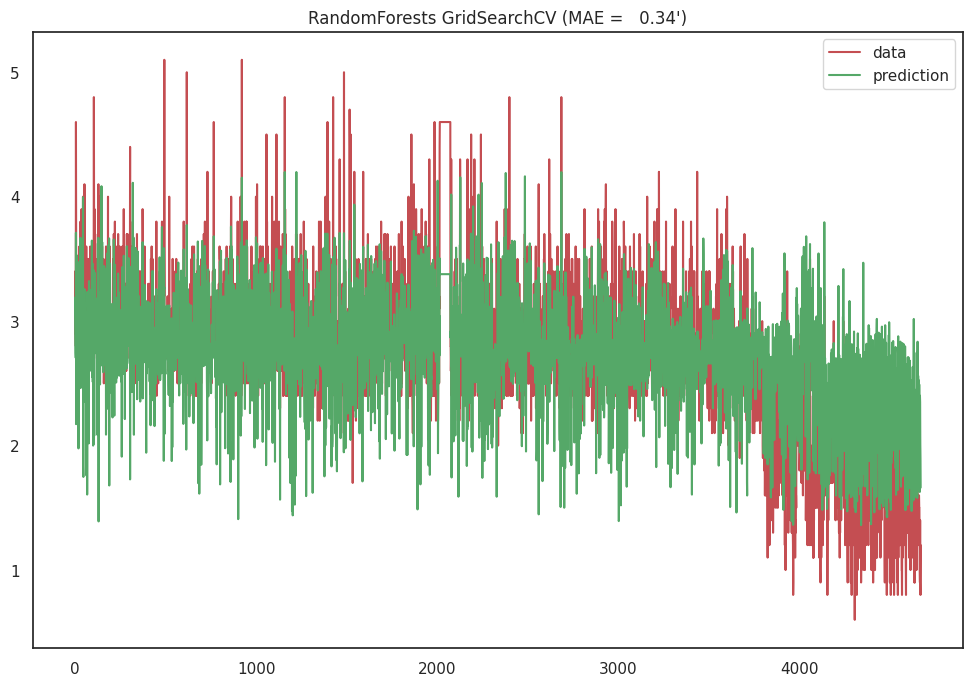

In [ ]:
from sklearn.metrics import mean_absolute_error


# x axis for plotting
import numpy as np
xx = np.stack([i for i in range(test['Magnitud'].shape[0])])
plt.plot(xx, test['Magnitud'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
print(train.values)

[[ 0.24121586  0.0373442  -0.04532958  0.09030149 -0.04064185  1.6       ]
 [ 0.19597714 -0.07105512 -0.13202934  0.16346731 -0.06141186  2.7       ]
 [ 0.228474    0.05718807 -0.05762096  0.14599077 -0.04507438  1.7       ]
 ...
 [-0.14512656 -0.08919168 -0.10043167 -0.14578946 -0.05355793  2.4       ]
 [-0.02665559  0.00743926 -0.04333216 -0.04477274 -0.01336356  2.7       ]
 [-0.05406132  0.04779087 -0.07263721  0.02215154 -0.04697512  3.        ]]


In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('PC1','PC2','PC3','PC4','PC5'),
              'Decision Tree': best_grid.feature_importances_})



Feature Relevancies


,Attributes,Decision Tree
0,PC1,0.313327
1,PC2,0.330608
2,PC3,0.128714
3,PC4,0.061591
4,PC5,0.165759


## RandomizedSearch

Para utilizar RandomizedSearchCV, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

In [ ]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "absolute_error"]}

n cada iteración, el algoritmo elegirá una combinación diferente de las características. Si se probaran de forma exhaustiva todas las características el problema se volvería muy costoso computacionalmente. Al menos al utilizar búsqueda aleatoria se seleccionará al azar una muestra de las mismas para buscar en un reducido pero significativo rango de valores.


Los argumentos más importantes en RandomizedSearchCV son *n_iter*, que controla el número de combinaciones diferentes a probar, y *cv*, que es el número de *cruces* a usar para la validación cruzada. Más iteraciones cubrirán un espacio de búsqueda más amplio y más *cruces* de cv reducen las posibilidades de sobreaprendizaje, pero al aumentar cada una de ellas se incrementará el tiempo de ejecución.

Vamos a ejecutarla utilizando la validación cruzada (5-fold) y posteriormente busca entre 100 combinaciones diferentes de entre las especificadas

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist,
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['Magnitud'], axis=1),
                           y = train['Magnitud'])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
355 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fee53af9ad0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fee53afa410>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

In [ ]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.186 (std: 1.121)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 16}

Model with rank: 2
Mean validation score: 0.105 (std: 1.322)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 22, 'n_estimators': 128}

Model with rank: 3
Mean validation score: -0.112 (std: 1.759)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 4}

Model with rank: 4
Mean validation score: -0.127 (std: 1.821)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 43, 'n_estimators': 32}

Model with rank: 5
Mean validation score: -0.191 (std: 1.9

In [ ]:
rnd_regres.best_params_

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 16}

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [ ]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])
y_pred = best_random.predict(X = test.drop(['Magnitud'], axis = 1))

# EVALUATE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Magnitud'], y_pred)
print ('MAE', mae)

# EVALUATE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Magnitud'], y_pred)
print ('MSE', mse)


# EVALUATE
import math
rmse = math.sqrt(mse)
print ('RMSE', rmse)

MAE 0.3468656296851574
MSE 0.24047640312098414
RMSE 0.49038393440342654


Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

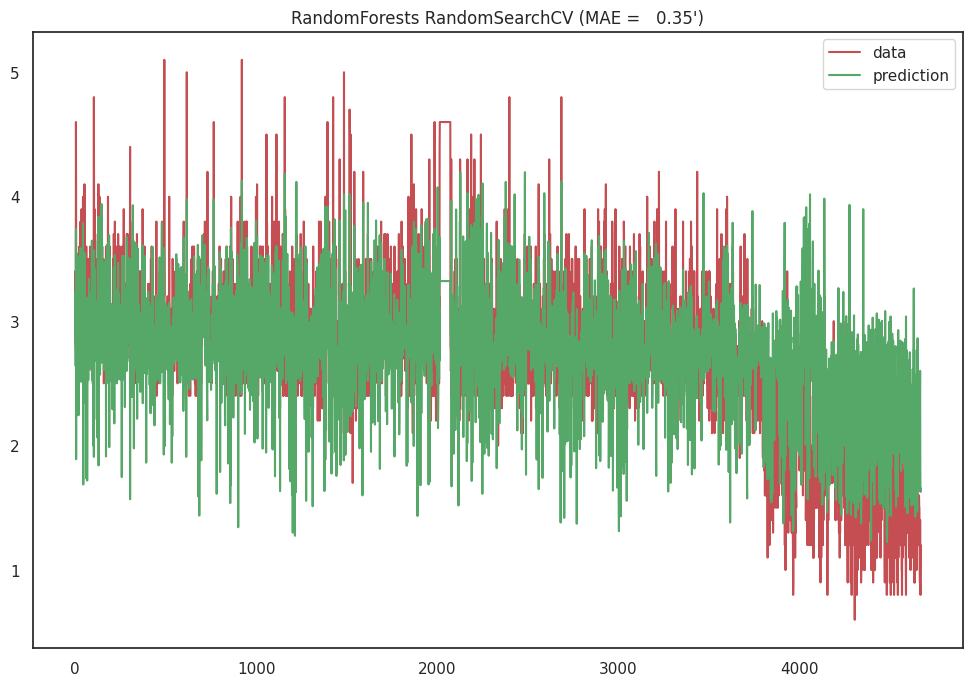

In [ ]:
from sklearn.metrics import mean_absolute_error


# x axis for plotting
import numpy as np
xx = np.stack([i for i in range(test['Magnitud'].shape[0])])
plt.plot(xx, test['Magnitud'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('PC1','PC2','PC3','PC4','PC5') ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,PC1,0.385906
1,PC2,0.295011
2,PC3,0.120554
3,PC4,0.053615
4,PC5,0.144914
